# MODELO PARA LA CLASIFICACIÓN DE PLANES PARA LA COMPAÑÍA MEGALINE. 

# DESCRIPCIÓN

Megaline, un operador móvil, busca optimizar la asignación de planes para sus clientes, ya que una gran cantidad sigue utilizando planes heredados. El objetivo de la empresa es desarrollar un modelo que analice el comportamiento de sus suscriptores y recomiende uno de sus nuevos planes: Smart o Ultra.

Se cuenta con datos de clientes que ya han migrado a estos planes, los cuales provienen del proyecto de análisis estadístico de datos. La tarea consiste en desarrollar un modelo de clasificación que sea capaz de recomendar el plan adecuado para cada cliente.

El reto es crear un modelo con la mayor precisión posible, con un umbral de exactitud mínima de 0.75. Se utilizará el dataset proporcionado para validar y ajustar el modelo, habiendo completado previamente el proceso de limpieza y preparación de los datos.

# 1 Dirección de datos.

 En este proyecto se trabajara con el archivo de datos `datasets/users_behavior.csv`. En la cual contiene información del comportamiento mensual sobre un usuario. La información dada es la siguiente:
 
- `'сalls'` : Son el número de llamadas. 
- `'minutes'`: Duración total de la llamada en minutos.
- `'messages'`: Número de mensajes de texto. 
- `'mb_used'`: Tráfico de Internet utilizado en MB,
- `'is_ultra'`: Plan para el mes actual (Ultra - 1, Smart - 0)

# 1.1 Inicialización 

In [1]:
# Cargar todas las librerías a usar en el proyecto. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 # Importar la función train_test_split desde la librería sklearn 
from sklearn.model_selection import train_test_split

# Importar la función del Ajuste de hiperparámetro 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Importar la función del Bosque aleatorio 
from sklearn.ensemble import RandomForestClassifier

# Importar la función de la Regresión Logística 
from sklearn.linear_model import LogisticRegression

#Importar la función de la Regresión Líneal 
from sklearn.linear_model import LinearRegression

# Importa la función de cálculo del EMC desde la librería scikit-learn
from sklearn.metrics import mean_squared_error


#Importar la función Dummy para el módelo ingenuo https://scikit-learn.org/stable/api/sklearn.dummy.html
from sklearn.dummy import DummyClassifier 

# 1.2 Cargar los datos. 

In [2]:
# Carga los archivos
user_behavoir = pd.read_csv('/datasets/users_behavior.csv')

# 1.3 Análisis de los datos

In [3]:
#Obtener la inofrmación de las bases de datos  con la cual se esta trabajando 
user_behavoir.info()
user_behavoir.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [4]:
# Obtener las 10 primeras filas de las bases de datos 
user_behavoir.head(25)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


# 1.4 Balances de clases de variable objetivo

0    2229
1     985
Name: is_ultra, dtype: int64


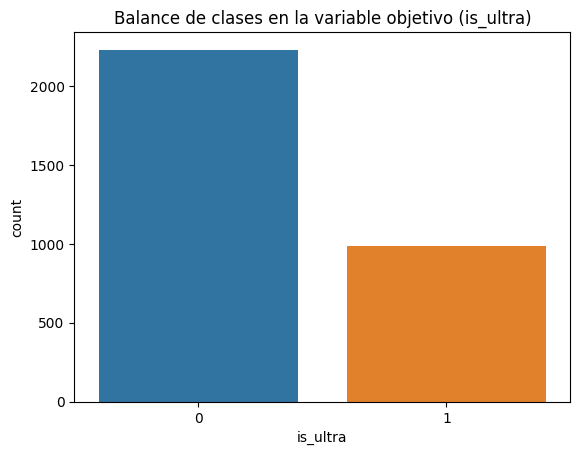

In [5]:
# Primer paso: Visualizar el balance de los datos. 
balance = user_behavoir['is_ultra'].value_counts()
print(balance)

#Segundo paso: Realizar gráfica de barras para visualizar el balance de clases
sns.countplot(x='is_ultra', data=user_behavoir)
plt.title('Balance de clases en la variable objetivo (is_ultra)')
plt.show()

Podemos observar que la mayoría de los usuarios está suscrita al plan Smart (representado por la clase 0), mientras que una minoría, alrededor del 30.65%, tiene el plan Ultra (clase 1). Este desequilibrio podría estar relacionado con los beneficios y servicios que el plan Smart ofrece, los cuales podrían ser más atractivos o asequibles para la mayoría de los consumidores

# 1.5 Distribución de los datos. 

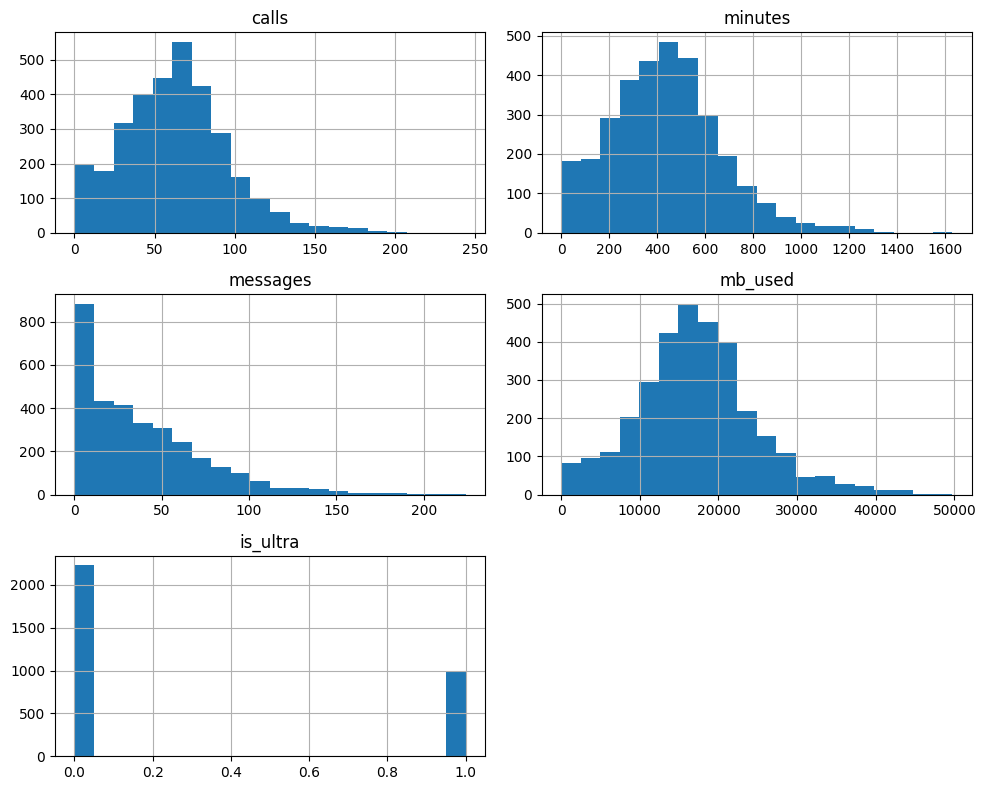

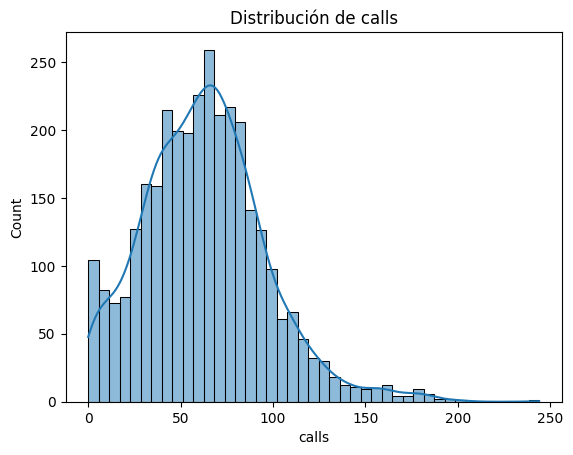

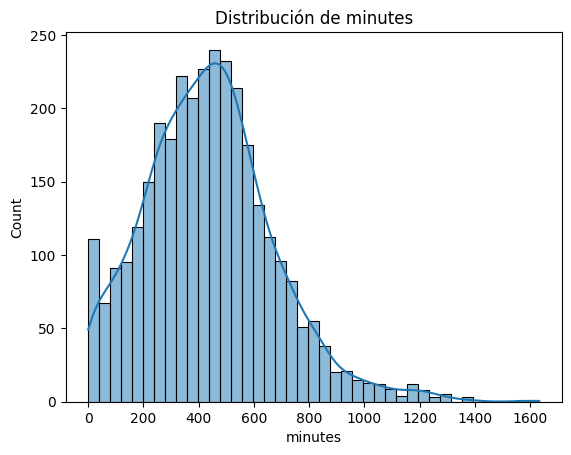

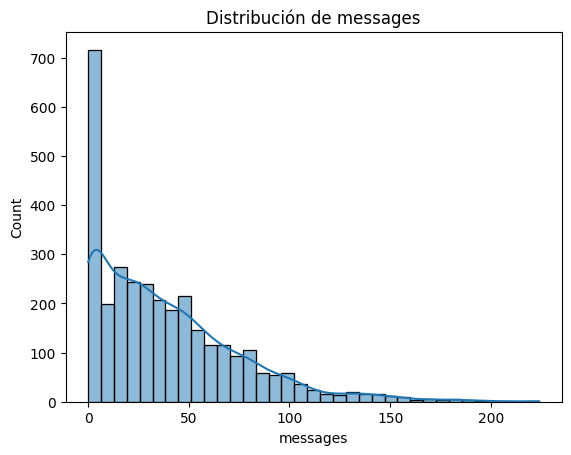

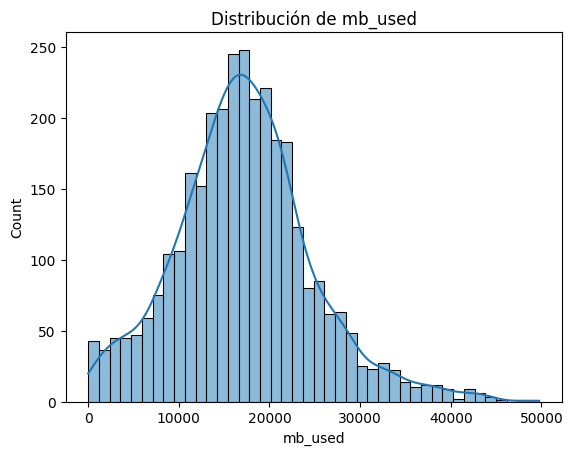

In [6]:
#Primer paso: Crear histogramas para todas las variables
user_behavoir.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()
print()
print()
#Segundo paso: Crear una distribución más detallada 
for column in user_behavoir.columns[:-1]:  # Omitimos 'is_ultra' que es la variable objetivo
    sns.histplot(user_behavoir[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

Calls (llamadas): La mayoría de los usuarios realizan entre 0 y 100 llamadas, con un pico alrededor de 50. Hay una disminución constante después de este punto, lo que sugiere que muy pocos usuarios realizan muchas llamadas.

Minutes (minutos): La distribución es similar a la de calls, centrada alrededor de 400-600 minutos. La mayoría de los usuarios consumen menos de 800 minutos, con una caída notable después de este punto.

Messages (mensajes): La mayoría de los usuarios envían pocos mensajes (entre 0 y 50), y la distribución disminuye rápidamente, indicando que los mensajes no son un uso frecuente.

MB_used (MB usados): Los datos utilizados muestran una distribución normal centrada alrededor de 20,000 MB, con algunos usuarios llegando hasta los 50,000 MB. Esto indica un uso considerable de datos móviles.

Is_ultra (planes Ultra): La mayoría de los usuarios no tienen el plan Smart (0), con una minoría significativa que sí lo tiene (1). Esto indica que el plan Ultra no es el más común entre los usuarios.

# 1.6 Verificación de los datos.

In [7]:
#Verificación de que no haya duplicado. 

duplicados= user_behavoir.duplicated().sum()
print(f'Se encontro que hay: {duplicados} duplicados en el DataFrame de User Behavoir')

Se encontro que hay: 0 duplicados en el DataFrame de User Behavoir


In [8]:
#comprobar los valores  ausentes 
user_behavoir_mis = user_behavoir.isna().sum()
print(user_behavoir_mis)

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


Se realizó este análisis para comprobar de que no estemos trabajando con datos duplicados o ausentes. Al comprobar que no hay ninguna discrepancía con los datos, se puede seguir con lo siguiente. 

# 2 Modelos

# 2.1 BOSQUE ALEATORIO 

In [9]:
# Dividir el dataset en 60% entrenamiento, 20% validación y 20% prueba
train_data, temp_data = train_test_split(user_behavoir, test_size=0.4, random_state=54321)
valid_data, test_data = train_test_split(temp_data, test_size=0.6, random_state=54321)

# Separar características y etiquetas
features_train = train_data.drop(['is_ultra'], axis=1)
target_train = train_data['is_ultra']
features_valid = valid_data.drop(['is_ultra'], axis=1)
target_valid = valid_data['is_ultra']
features_test = test_data.drop(['is_ultra'], axis=1)
target_test = test_data['is_ultra']

# Entrenar el mejor modelo 
best_model = RandomForestClassifier(n_estimators=40, random_state=54321)
best_model.fit(features_train, target_train)

# Evaluar en el conjunto de validación
valid_score = best_model.score(features_valid, target_valid)
print(f"Exactitud en el conjunto de validación: {valid_score}")

# Verificar si la exactitud en validación es mayor o igual a 0.75
if valid_score >= 0.75:
    print(f"El modelo cumple con el umbral de 0.75 en validación: {valid_score}")
else:
    print(f"El modelo no cumple con el umbral en validación. Exactitud: {valid_score}")

# Evaluar en el conjunto de prueba
test_score = best_model.score(features_test, target_test)
print(f"Exactitud en el conjunto de prueba: {test_score}")

# Verificar si la exactitud en el conjunto de prueba es mayor o igual a 0.75
if test_score >= 0.75:
    print(f"El modelo cumple con el umbral de 0.75 en prueba: {test_score}")
else:
    print(f"El modelo no cumple con el umbral en prueba. Exactitud: {test_score}")

# Crear un modelo ingenuo que predice la clase mayoritaria
dummy_model = DummyClassifier(strategy="most_frequent", random_state=54321)
dummy_model.fit(features_train, target_train)

# Evaluar el modelo en el conjunto de validación
dummy_valid_score = dummy_model.score(features_valid, target_valid)
print(f"Exactitud del modelo ingenuo en el conjunto de validación: {dummy_valid_score}")

# Evaluar el modelo en el conjunto de prueba
dummy_test_score = dummy_model.score(features_test, target_test)
print(f"Exactitud del modelo ingenuo en el conjunto de prueba: {dummy_test_score}")

Exactitud en el conjunto de validación: 0.7801556420233463
El modelo cumple con el umbral de 0.75 en validación: 0.7801556420233463
Exactitud en el conjunto de prueba: 0.8160621761658031
El modelo cumple con el umbral de 0.75 en prueba: 0.8160621761658031
Exactitud del modelo ingenuo en el conjunto de validación: 0.6498054474708171
Exactitud del modelo ingenuo en el conjunto de prueba: 0.7137305699481865


# 2.2 REGRESIÓN LOGÍSTICA 

In [10]:
# Dividir el dataset en 60% entrenamiento, 20% validación y 20% prueba
train_data, temp_data = train_test_split(user_behavoir, test_size=0.4, random_state=54321)
valid_data, test_data = train_test_split(temp_data, test_size=0.6, random_state=54321)

# Separar características y etiquetas
features_train = train_data.drop(['is_ultra'], axis=1)
target_train = train_data['is_ultra']
features_valid = valid_data.drop(['is_ultra'], axis=1)
target_valid = valid_data['is_ultra']
features_test = test_data.drop(['is_ultra'], axis=1)
target_test = test_data['is_ultra']

# Entrenar el mejor modelo 
best_model = LogisticRegression(random_state = 54321, solver= 'liblinear')
best_model.fit(features_train, target_train)

# Evaluar en el conjunto de validación
valid_score = best_model.score(features_valid, target_valid)
print(f"Exactitud en el conjunto de validación: {valid_score}")

# Verificar si la exactitud en validación es mayor o igual a 0.75
if valid_score >= 0.75:
    print(f"El modelo cumple con el umbral de 0.75 en validación: {valid_score}")
else:
    print(f"El modelo no cumple con el umbral en validación. Exactitud: {valid_score}")

# Evaluar en el conjunto de prueba
test_score = best_model.score(features_test, target_test)
print(f"Exactitud en el conjunto de prueba: {test_score}")

# Verificar si la exactitud en el conjunto de prueba es mayor o igual a 0.75
if test_score >= 0.75:
    print(f"El modelo cumple con el umbral de 0.75 en prueba: {test_score}")
else:
    print(f"El modelo no cumple con el umbral en prueba. Exactitud: {test_score}")

# Crear un modelo ingenuo que predice la clase mayoritaria
dummy_model = DummyClassifier(strategy="most_frequent", random_state=54321)
dummy_model.fit(features_train, target_train)

# Evaluar el modelo en el conjunto de validación
dummy_valid_score = dummy_model.score(features_valid, target_valid)
print(f"Exactitud del modelo ingenuo en el conjunto de validación: {dummy_valid_score}")

# Evaluar el modelo en el conjunto de prueba
dummy_test_score = dummy_model.score(features_test, target_test)
print(f"Exactitud del modelo ingenuo en el conjunto de prueba: {dummy_test_score}")

Exactitud en el conjunto de validación: 0.6712062256809338
El modelo no cumple con el umbral en validación. Exactitud: 0.6712062256809338
Exactitud en el conjunto de prueba: 0.7344559585492227
El modelo no cumple con el umbral en prueba. Exactitud: 0.7344559585492227
Exactitud del modelo ingenuo en el conjunto de validación: 0.6498054474708171
Exactitud del modelo ingenuo en el conjunto de prueba: 0.7137305699481865


# 2.3  ÁRBOL DECISIÓN 

In [11]:
# Dividir el dataset en 60% entrenamiento, 20% validación y 20% prueba
train_data, temp_data = train_test_split(user_behavoir, test_size=0.4, random_state=54321)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=54321)

# Separar características y etiquetas
features_train = train_data.drop(['is_ultra'], axis=1)
target_train = train_data['is_ultra']
features_valid = valid_data.drop(['is_ultra'], axis=1)
target_valid = valid_data['is_ultra']
features_test = test_data.drop(['is_ultra'], axis=1)
target_test = test_data['is_ultra']

# Entrenar el modelo de Árbol de Decisiones
decision_tree_model = DecisionTreeClassifier(max_depth=10,  random_state=54321)

decision_tree_model.fit(features_train, target_train)

# Evaluar en el conjunto de validación
valid_predictions = decision_tree_model.predict(features_valid)
valid_score = accuracy_score(target_valid, valid_predictions)
print(f"Exactitud en el conjunto de validación: {valid_score}")

# Verificar si la exactitud en validación es mayor o igual a 0.75
if valid_score >= 0.75:
    print(f"El modelo cumple con el umbral de 0.75 en validación: {valid_score}")
else:
    print(f"El modelo no cumple con el umbral en validación. Exactitud: {valid_score}")

# Evaluar en el conjunto de prueba
test_predictions = decision_tree_model.predict(features_test)
test_score = accuracy_score(target_test, test_predictions)
print(f"Exactitud en el conjunto de prueba: {test_score}")

# Verificar si la exactitud en el conjunto de prueba es mayor o igual a 0.75
if test_score >= 0.75:
    print(f"El modelo cumple con el umbral de 0.75 en prueba: {test_score}")
else:
    print(f"El modelo no cumple con el umbral en prueba. Exactitud: {test_score}")

# Crear un modelo ingenuo que predice la clase mayoritaria
dummy_model = DummyClassifier(strategy="most_frequent", random_state=54321)
dummy_model.fit(features_train, target_train)

# Evaluar el modelo en el conjunto de validación
dummy_valid_predictions = dummy_model.predict(features_valid)
dummy_valid_score = accuracy_score(target_valid, dummy_valid_predictions)
print(f"Exactitud del modelo ingenuo en el conjunto de validación: {dummy_valid_score}")

# Evaluar el modelo en el conjunto de prueba
dummy_test_predictions = dummy_model.predict(features_test)
dummy_test_score = accuracy_score(target_test, dummy_test_predictions)
print(f"Exactitud del modelo ingenuo en el conjunto de prueba: {dummy_test_score}")
    

Exactitud en el conjunto de validación: 0.7822706065318819
El modelo cumple con el umbral de 0.75 en validación: 0.7822706065318819
Exactitud en el conjunto de prueba: 0.8055987558320373
El modelo cumple con el umbral de 0.75 en prueba: 0.8055987558320373
Exactitud del modelo ingenuo en el conjunto de validación: 0.6516329704510109
Exactitud del modelo ingenuo en el conjunto de prueba: 0.7247278382581649


# CONCLUSIÓN GENERAL 
El Bosque Aleatorio y el Árbol de Decisión tienen buenos resultados, superando el umbral del 0.75 tanto en validación como en prueba.
El modelo de Regresión Logística no logra alcanzar ese umbral, lo que indica que no es tan eficaz para este problema en particular.
El modelo ingenuo, que predice la clase mayoritaria, sirve como referencia y tiene un rendimiento significativamente más bajo que los modelos de Machine Learning entrenados.
En resumen, el Bosque Aleatorio y el Árbol de Decisión son las mejores opciones, con el Bosque Aleatorio ligeramente superior en exactitud.

In [13]:
import joblib
 
# Paso 1: Cargar el modelo entrenado
model_s9 = joblib.load('modelf_spring9.joblib')


# Paso 2: Definir un conjunto de datos de entrada de muestra
sample_input = np.array([[85, 516.75, 56, 22696.96],  # Muestra 1
                         [7, 43.39, 3, 2538.67]])  # Muestra 2

# Paso 3: Realizar la predicción con el modelo cargado
sample_prediction = model_s9.predict(sample_input)

# Paso 4: Mostrar el resultado de la predicción
print(f'Predicciones del modelo entrenado: {sample_prediction}')

# Paso 5: Crear el modelo dummy que siempre predice la clase mayoritaria
dummy_model = DummyClassifier(strategy="most_frequent")
real_values = np.array([0, 1])  # Clases reales de ejemplo

# Entrenar el modelo dummy con los valores reales
dummy_model.fit(sample_input, real_values)

# Realizar la predicción con el modelo dummy
dummy_prediction = dummy_model.predict(sample_input)
print(f'Predicciones del modelo dummy: {dummy_prediction}')

# Paso 6: Calcular la precisión de ambos modelos
accuracy_model = accuracy_score(real_values, sample_prediction)
accuracy_dummy = accuracy_score(real_values, dummy_prediction)

# Paso 7: Imprimir las precisiones
print(f'Precisión del modelo entrenado en la prueba de cordura: {accuracy_model:.2f}')
print(f'Precisión del modelo dummy en la prueba de cordura: {accuracy_dummy:.2f}')


Predicciones del modelo entrenado: [0 1]
Predicciones del modelo dummy: [0 0]
Precisión del modelo entrenado en la prueba de cordura: 1.00
Precisión del modelo dummy en la prueba de cordura: 0.50


El modelo que se utilizo fue el bosque aleatorio para hacer la prueba de cordura. Debido a que este obtuvo mayor preccisión que los demás. 

Con este se puedo observar que el nivel de precisión es de **1.00** sugiere que el modelo es altamente efectivo en la clasificación de los planes de los usuarios en este conjunto de datos.

En el caso del modelo dummy se obtuvo una precisión del 50%. El modelo dummy  predices la clase más frecuente, no captas bien la variabilidad del conjunto de datos.


# Conclusión 
En este análisis, se evaluaron tres modelos de clasificación para predecir si un usuario pertenece a la clase "ultra" o no: un Bosque Aleatorio, una Regresión Logística y un Árbol de Decisión. Para cada modelo, se evaluó su rendimiento en términos de precisión utilizando un conjunto de datos dividido en 60% para entrenamiento, 20% para validación y 20% para prueba. Además, se realizó una prueba de cordura comparando el mejor modelo entrenado con un modelo dummy que siempre predice la clase mayoritaria.

Para finalizar, el Bosque Aleatorio y el Árbol de Decisión fueron los modelos más efectivos, alcanzando ambos el umbral de precisión de 0.75 tanto en los conjuntos de validación como de prueba. En contraste, la Regresión Logística no logró superar el umbral, lo que indica que este modelo no es el más adecuado para este problema. Finalmente, la prueba de cordura demuestra que los modelos entrenados son significativamente más precisos que un modelo ingenuo como el dummy, lo que confirma que estos modelos captan patrones relevantes y generalizan bien a nuevos datos.